In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
CLIENT_ID = 'NYBAZPZCV0IZ12RADSLE1UMDH01MPFF0ZAMD0RTDRQ20L0L0' # your Foursquare ID
CLIENT_SECRET = 'M0KOAUJ1HKEJ5DQU34ESJTWVAZCA4MPZBYVSB4Z42SURMXZU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500 # acquiring as many as starbucks store as possible
search_query = 'Starbucks'
radius = 1000000 # set a large area database
address = 'New York, NY'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [3]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=NYBAZPZCV0IZ12RADSLE1UMDH01MPFF0ZAMD0RTDRQ20L0L0&client_secret=M0KOAUJ1HKEJ5DQU34ESJTWVAZCA4MPZBYVSB4Z42SURMXZU&ll=40.7127281,-74.0060152&v=20180604&query=Starbucks&radius=1000000&limit=500'

In [4]:
results = requests.get(url).json() #getting the json file
results 

{'meta': {'code': 200, 'requestId': '5e16936d29ce6a001b7676ac'},
 'response': {'venues': [{'id': '4b7de017f964a52049d82fe3',
    'name': 'Starbucks',
    'location': {'address': '195 Broadway',
     'crossStreet': 'at Dey St',
     'lat': 40.710922,
     'lng': -74.010284,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.710922,
       'lng': -74.010284}],
     'distance': 412,
     'postalCode': '10007',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['195 Broadway (at Dey St)',
      'New York, NY 10007',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1578537996',
    'hasPerk': False},
   {'id': '4a84eb0af964a520e1fd

In [5]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

In [6]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Starbucks,Coffee Shop,195 Broadway,US,New York,United States,at Dey St,412,"[195 Broadway (at Dey St), New York, NY 10007,...","[{'label': 'display', 'lat': 40.710922, 'lng':...",40.710922,-74.010284,NaN,10007,NY,4b7de017f964a52049d82fe3
1,Starbucks,Coffee Shop,38 Park Row,US,New York,United States,at Beekman St,139,"[38 Park Row (at Beekman St), New York, NY 100...","[{'label': 'display', 'lat': 40.71159756, 'lng...",40.711598,-74.006726,NaN,10038,NY,4a84eb0af964a520e1fd1fe3
2,Starbucks,Coffee Shop,125 Chambers St,US,New York,United States,at W Broadway,402,"[125 Chambers St (at W Broadway), New York, NY...","[{'label': 'display', 'lat': 40.715534, 'lng':...",40.715534,-74.009030,NaN,10007,NY,4a718a5af964a52041d91fe3
3,Starbucks,Coffee Shop,233 Broadway,US,New York,United States,at Barclay St,181,"[233 Broadway (at Barclay St), New York, NY 10...","[{'label': 'display', 'lat': 40.71220388, 'lng...",40.712204,-74.008052,NaN,10279,NY,4ad76597f964a5200e0a21e3
4,Starbucks Reserve,Coffee Shop,250 Vesey St,US,New York,United States,2nd Fl,810,"[250 Vesey St (2nd Fl), New York, NY 10281, Un...","[{'label': 'display', 'lat': 40.71417, 'lng': ...",40.714170,-74.015434,Battery Park City,10281,NY,4ce41f161594236ac316fb49


In [7]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [8]:
ratings = []
# acquire ratings for each store with its ID
for i in np.arange(len(dataframe_filtered)):
    venue_id = dataframe_filtered['id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    ratings.append(result['response']['venue']['rating'])
dataframe_filtered['Ratings'] = ratings

In [9]:
dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Ratings
0,Starbucks,Coffee Shop,195 Broadway,US,New York,United States,at Dey St,412,"[195 Broadway (at Dey St), New York, NY 10007,...","[{'label': 'display', 'lat': 40.710922, 'lng':...",40.710922,-74.010284,NaN,10007,NY,4b7de017f964a52049d82fe3,6.9
1,Starbucks,Coffee Shop,38 Park Row,US,New York,United States,at Beekman St,139,"[38 Park Row (at Beekman St), New York, NY 100...","[{'label': 'display', 'lat': 40.71159756, 'lng...",40.711598,-74.006726,NaN,10038,NY,4a84eb0af964a520e1fd1fe3,6.8
2,Starbucks,Coffee Shop,125 Chambers St,US,New York,United States,at W Broadway,402,"[125 Chambers St (at W Broadway), New York, NY...","[{'label': 'display', 'lat': 40.715534, 'lng':...",40.715534,-74.009030,NaN,10007,NY,4a718a5af964a52041d91fe3,6.6
3,Starbucks,Coffee Shop,233 Broadway,US,New York,United States,at Barclay St,181,"[233 Broadway (at Barclay St), New York, NY 10...","[{'label': 'display', 'lat': 40.71220388, 'lng...",40.712204,-74.008052,NaN,10279,NY,4ad76597f964a5200e0a21e3,7.4
4,Starbucks Reserve,Coffee Shop,250 Vesey St,US,New York,United States,2nd Fl,810,"[250 Vesey St (2nd Fl), New York, NY 10281, Un...","[{'label': 'display', 'lat': 40.71417, 'lng': ...",40.714170,-74.015434,Battery Park City,10281,NY,4ce41f161594236ac316fb49,8.4


In [10]:
df = dataframe_filtered[['name','address','distance','lat','lng','Ratings']] #selecting important features, such as distance, lan, lang, and ratings

In [11]:
df.sort_values(by=['distance'], inplace= True) # sort the dataframe by distance

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
df = df[df.name == 'Starbucks'] #further clean the data by removing Starbucks reserves, since those stores have a rather high score

In [13]:
df.index = np.arange(len(df)) # rearrange the dataframe index

In [14]:
df

,name,address,distance,lat,lng,Ratings
0,Starbucks,38 Park Row,139,40.711598,-74.006726,6.8
1,Starbucks,233 Broadway,181,40.712204,-74.008052,7.4
2,Starbucks,1 Pace Plz,204,40.711142,-74.004796,6.8
3,Starbucks,291 Broadway,236,40.714855,-74.005936,6.8
4,Starbucks,120 Church St,282,40.713839,-74.009026,6.9
5,Starbucks,130 Fulton St,323,40.710280,-74.008080,6.3
6,Starbucks,125 Chambers St,402,40.715534,-74.009030,6.6
7,Starbucks,111 Worth St,410,40.715714,-74.003154,6.8
8,Starbucks,195 Broadway,412,40.710922,-74.010284,6.9
9,Starbucks,100 William St,494,40.708412,-74.007400,6.5


In [15]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library

In [16]:
#clustering by lat and lng
x1 = df['lat']
x2 = df['lng']
X = np.array([x1,x2])
X = X.transpose()   

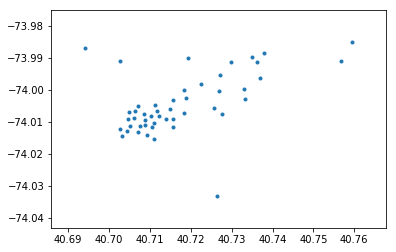

In [17]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [18]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 20)

In [19]:
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

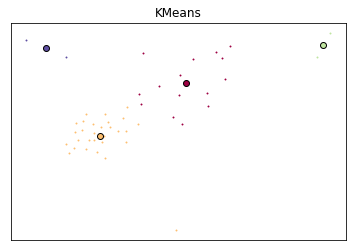

In [20]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [21]:
df['label'] = k_means_labels  #adding labels in the dataframe, help to plot the clustering by colors

In [22]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the New York
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

folium.features.CircleMarker(
    k_means_cluster_centers[0],
    radius=8,
    color='blue',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 1.0
).add_to(venues_map)

folium.features.CircleMarker(
    k_means_cluster_centers[1],
    radius=8,
    color='green',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'green',
    fill_opacity = 1.0
).add_to(venues_map)

folium.features.CircleMarker(
    k_means_cluster_centers[2],
    radius=8,
    color='yellow',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'yellow',
    fill_opacity = 1.0
).add_to(venues_map)

folium.features.CircleMarker(
    k_means_cluster_centers[3],
    radius=8,
    color='purple',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'purple',
    fill_opacity = 1.0
).add_to(venues_map)



# add the Starbucks store by different colors
for lat, lng,group in zip(df.lat, df.lng,df.label):
    if (group == 0):
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='blue',
            popup='Coffeshop',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
    elif (group == 1):
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='green',
            popup='Coffeshop',
            fill = True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(venues_map)
    elif group == 2:
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='yellow',
            popup='Coffeshop',
            fill = True,
            fill_color='yellow',
            fill_opacity=0.6
        ).add_to(venues_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='purple',
            popup='Coffeshop',
            fill = True,
            fill_color='purple',
            fill_opacity=0.6
        ).add_to(venues_map)
        
# display map
venues_map

In [23]:
averagescores=[]
for i in np.arange(4):
    mean = np.mean(df[df.label == i].Ratings)
    averagescores.append(mean)
# getting the averagescore for each clustered mean

In [24]:
averagescores

[6.46, 6.831034482758621, 8.1, 6.45]

In [25]:
# clustering by distance and ratings
x1 = df['distance']
x2 = df['Ratings']
X = np.array([x1,x2])
X = X.transpose()

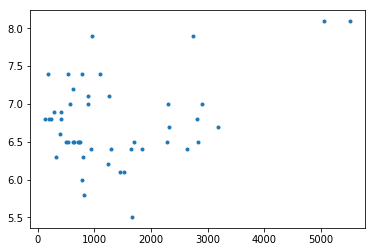

In [26]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [27]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 20)

k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

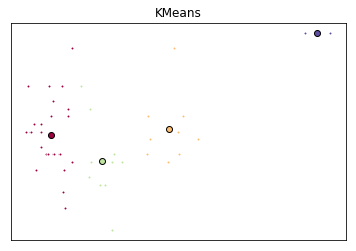

In [28]:


# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()




In [29]:
k_means_cluster_centers
k_means_labels
df['label'] = k_means_labels

In [30]:


venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

for lat, lng,group in zip(df.lat, df.lng,df.label):
    if (group == 0):
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='blue',
            popup='Coffeshop',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
    elif (group == 1):
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='green',
            popup='Coffeshop',
            fill = True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(venues_map)
    elif group == 2:
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='yellow',
            popup='Coffeshop',
            fill = True,
            fill_color='yellow',
            fill_opacity=0.6
        ).add_to(venues_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='purple',
            popup='Coffeshop',
            fill = True,
            fill_color='purple',
            fill_opacity=0.6
        ).add_to(venues_map)
        
# display map
venues_map

In [31]:
averagescores=[]
for i in np.arange(4):
    mean = np.mean(df[df.label == i].Ratings)
    averagescores.append(mean)

averagescores
# getting the scores for each clustering

[6.751851851851853, 6.833333333333333, 6.410000000000001, 8.1]

In [32]:
df = dataframe_filtered[['name','address','distance','lat','lng','Ratings']]
df.sort_values(by=['distance'], inplace= True)
df = df[df.name == 'Starbucks']
df.index = np.arange(len(df))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
df.head()

,name,address,distance,lat,lng,Ratings
0,Starbucks,38 Park Row,139,40.711598,-74.006726,6.8
1,Starbucks,233 Broadway,181,40.712204,-74.008052,7.4
2,Starbucks,1 Pace Plz,204,40.711142,-74.004796,6.8
3,Starbucks,291 Broadway,236,40.714855,-74.005936,6.8
4,Starbucks,120 Church St,282,40.713839,-74.009026,6.9


In [34]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, distance in zip(df.lat, df.lng, df.distance):
    if distance < 1000:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            popup='Coffeshop',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
    elif distance < 2000:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            popup='Coffeshop',
            fill = True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(venues_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            popup='Coffeshop',
            fill = True,
            fill_color='yellow',
            fill_opacity=0.6
        ).add_to(venues_map)
# display map
venues_map # clustering by distance

In [35]:
df1 = df[df['distance'] <1000]
x1 = df1['lat']
x2 = df1['lng']
X = np.array([x1,x2])
X = X.transpose()

In [36]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 20)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

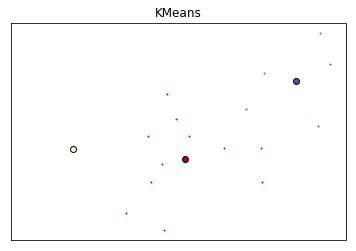

In [37]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [38]:
df1['label'] = k_means_labels
averagescores=[]
for i in np.arange(3):
    mean = np.mean(df1[df1.label == i].Ratings)
    averagescores.append(mean)

averagescores
# getting the scores for each clustering

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


[6.718181818181818, 6.800000000000001, 6.720000000000001]

In [39]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, group in zip(df1.lat, df1.lng, df1.label):
    if group == 0:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            popup='Coffeshop',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
    elif group ==1:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            popup='Coffeshop',
            fill = True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(venues_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            popup='Coffeshop',
            fill = True,
            fill_color='yellow',
            fill_opacity=0.6
        ).add_to(venues_map)
# display map
venues_map # clustering by distance

In [40]:
df2  = df[df['distance'] >1000]
df2 =  df2[df2['distance']<2000]

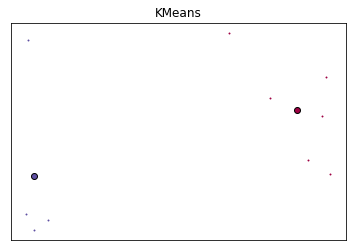

In [41]:
x1 = df2['lat']
x2 = df2['lng']
X = np.array([x1,x2])
X = X.transpose()

k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 20)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [42]:
df2['label'] = k_means_labels
averagescores=[]
for i in np.arange(2):
    mean = np.mean(df2[df2.label == i].Ratings)
    averagescores.append(mean)

averagescores
# getting the scores for each clustering

[6.1499999999999995, 6.800000000000001]

In [43]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, group in zip(df2.lat, df2.lng, df2.label):
    if group == 0:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            popup='Coffeshop',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='purple',
            popup='Coffeshop',
            fill = True,
            fill_color='purple',
            fill_opacity=0.6
        ).add_to(venues_map)
# display map
venues_map # clustering by distance

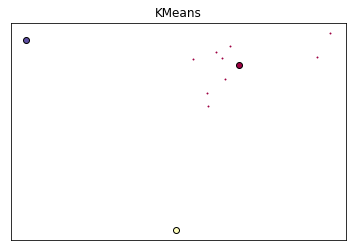

In [44]:
df3  = df[df['distance'] >2000]

x1 = df3['lat']
x2 = df3['lng']
X = np.array([x1,x2])
X = X.transpose()

k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 20)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [45]:
df3['label'] = k_means_labels
averagescores=[]
for i in np.arange(3):
    mean = np.mean(df3[df3.label == i].Ratings)
    averagescores.append(mean)

averagescores
# getting the scores for each clustering

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


[7.044444444444445, 7.9, 6.4]

In [46]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Seattle, WA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, group in zip(df3.lat, df3.lng, df3.label):
    if group == 0:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            popup='Coffeshop',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
    elif group ==1:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            popup='Coffeshop',
            fill = True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(venues_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            popup='Coffeshop',
            fill = True,
            fill_color='yellow',
            fill_opacity=0.6
        ).add_to(venues_map)
# display map
venues_map # clustering by distance

In [47]:
#checking if the distance plays a role in affecting the ratings
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['distance']])
train_y = np.asanyarray(df[['Ratings']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00015857]]
Intercept:  [6.5375935]


Text(0, 0.5, 'Ratings')

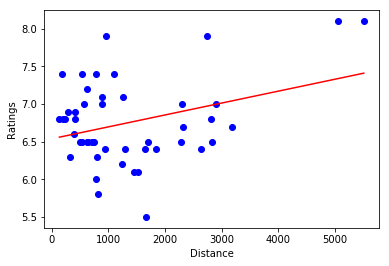

In [48]:
plt.scatter(df.distance, df.Ratings,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Distance")
plt.ylabel("Ratings")

In [49]:
df

,name,address,distance,lat,lng,Ratings
0,Starbucks,38 Park Row,139,40.711598,-74.006726,6.8
1,Starbucks,233 Broadway,181,40.712204,-74.008052,7.4
2,Starbucks,1 Pace Plz,204,40.711142,-74.004796,6.8
3,Starbucks,291 Broadway,236,40.714855,-74.005936,6.8
4,Starbucks,120 Church St,282,40.713839,-74.009026,6.9
5,Starbucks,130 Fulton St,323,40.710280,-74.008080,6.3
6,Starbucks,125 Chambers St,402,40.715534,-74.009030,6.6
7,Starbucks,111 Worth St,410,40.715714,-74.003154,6.8
8,Starbucks,195 Broadway,412,40.710922,-74.010284,6.9
9,Starbucks,100 William St,494,40.708412,-74.007400,6.5
